<a href="https://colab.research.google.com/github/LohithVarun/DSA0615-DataHandlingAndVisualization/blob/main/Activity%20Programs/DAY_1_activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DAY 1

1) R script for unemployment data plots

---



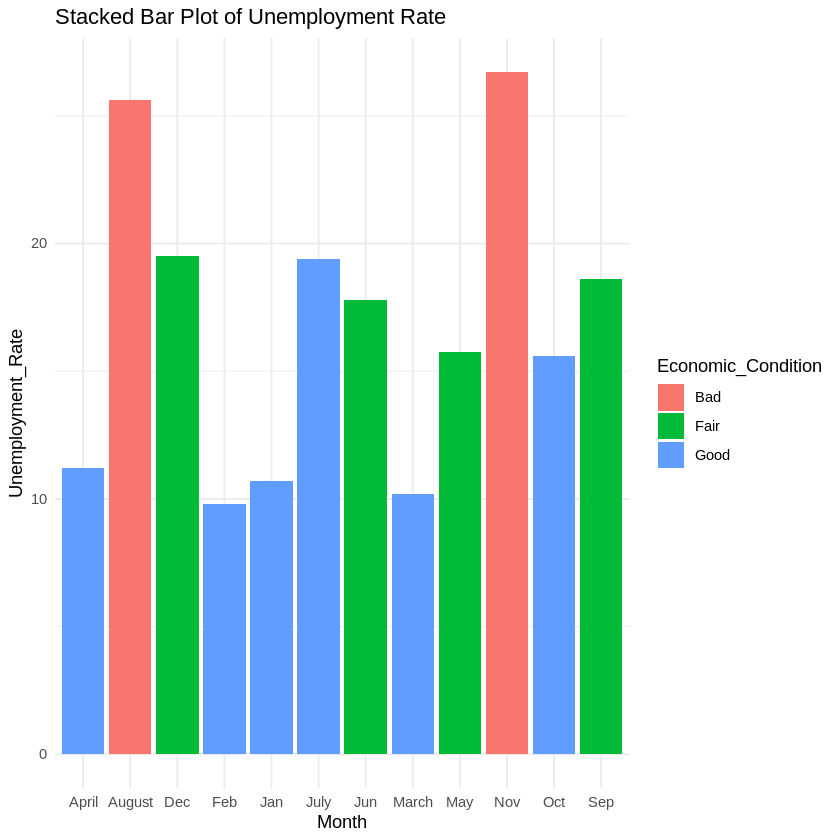

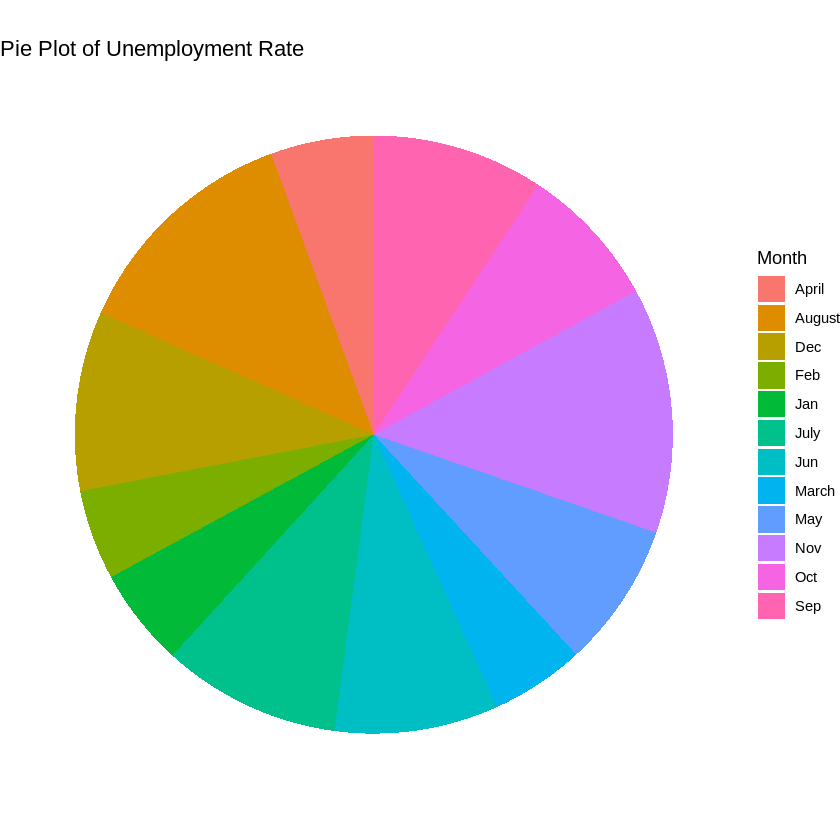

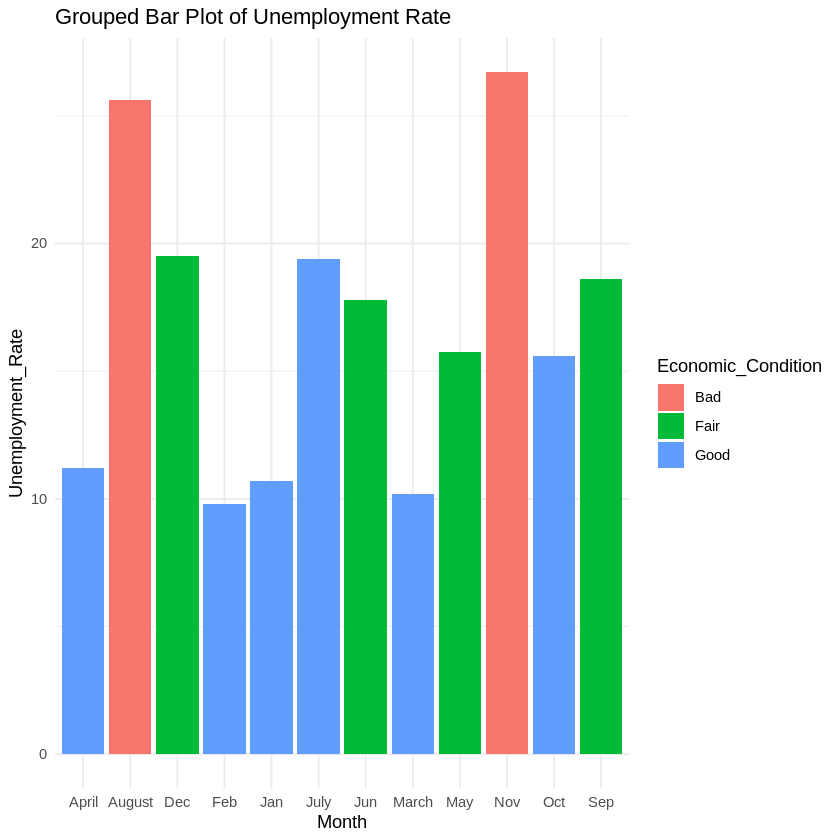

In [1]:
library(ggplot2)
library(tidyr)

data <- data.frame(
  Month = c("Jan", "Feb", "March", "April", "May", "Jun", "July", "August", "Sep", "Oct", "Nov", "Dec"),
  Economic_Condition = c("Good", "Good", "Good", "Good", "Fair", "Fair", "Good", "Bad", "Fair", "Good", "Bad", "Fair"),
  Unemployment_Rate = c(10.7, 9.8, 10.2, 11.2, 15.75, 17.8, 19.4, 25.6, 18.6, 15.6, 26.7, 19.5)
)

stacked_bar <- ggplot(data, aes(x = Month, y = Unemployment_Rate, fill = Economic_Condition)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  labs(title = "Stacked Bar Plot of Unemployment Rate")

pie_plot <- ggplot(data, aes(x = "", y = Unemployment_Rate, fill = Month)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  theme_void() +
  labs(title = "Pie Plot of Unemployment Rate")

grouped_bar <- ggplot(data, aes(x = Month, y = Unemployment_Rate, fill = Economic_Condition)) +
  geom_bar(stat = "identity", position = "dodge") +
  theme_minimal() +
  labs(title = "Grouped Bar Plot of Unemployment Rate")

print(stacked_bar)
print(pie_plot)
print(grouped_bar)

2) R script for school and grade level plots

---



       GRADE_LEVEL Grade 1 Grade 2 Grade 3
SCHOOL                                    
A                        1       1       1
B                        1       1       1
C                        1       1       1
D                        1       1       1


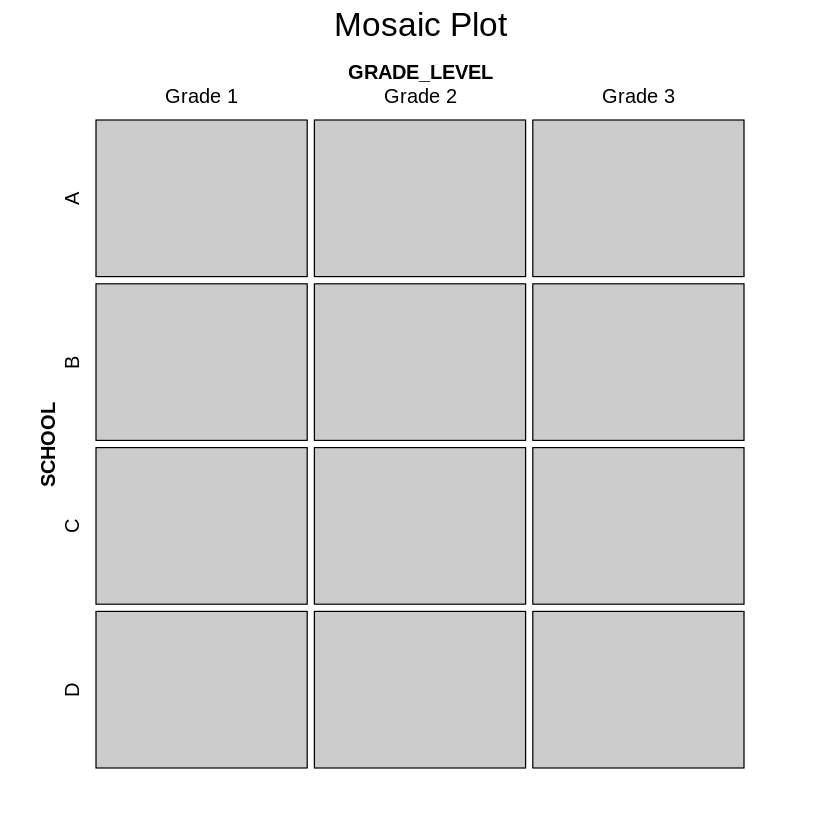

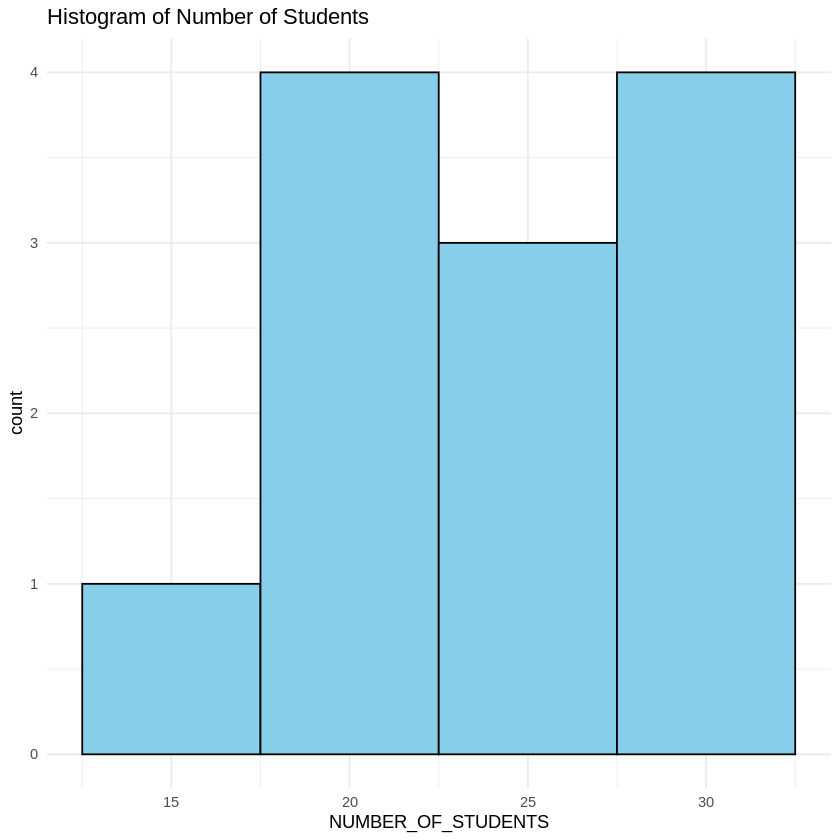

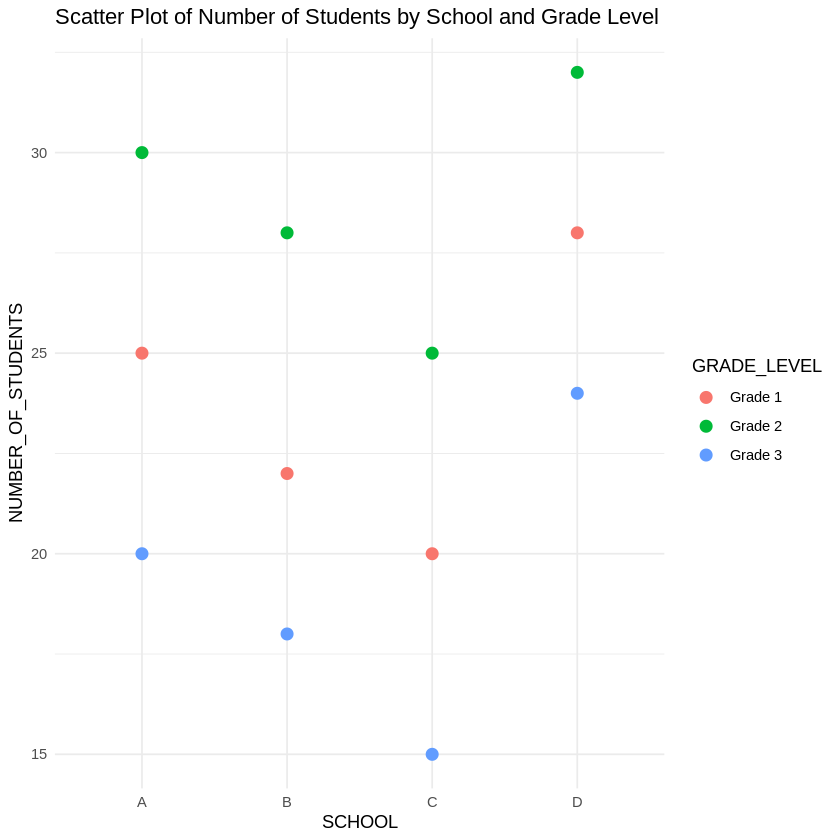

In [4]:
library(ggplot2)
library(vcd)

data <- data.frame(
  SCHOOL = rep(c("A", "B", "C", "D"), each = 3),
  GRADE_LEVEL = rep(c("Grade 1", "Grade 2", "Grade 3"), 4),
  NUMBER_OF_STUDENTS = c(25, 30, 20, 22, 28, 18, 20, 25, 15, 28, 32, 24)
)

mosaic_plot <- mosaic(~ SCHOOL + GRADE_LEVEL, data = data, main = "Mosaic Plot")

histogram_plot <- ggplot(data, aes(x = NUMBER_OF_STUDENTS)) +
  geom_histogram(binwidth = 5, fill = "skyblue", color = "black") +
  theme_minimal() +
  labs(title = "Histogram of Number of Students")

scatter_plot <- ggplot(data, aes(x = SCHOOL, y = NUMBER_OF_STUDENTS, color = GRADE_LEVEL)) +
  geom_point(size = 3) +
  theme_minimal() +
  labs(title = "Scatter Plot of Number of Students by School and Grade Level")

print(mosaic_plot)
print(histogram_plot)
print(scatter_plot)

3) R script for temperature and precipitation plots

---



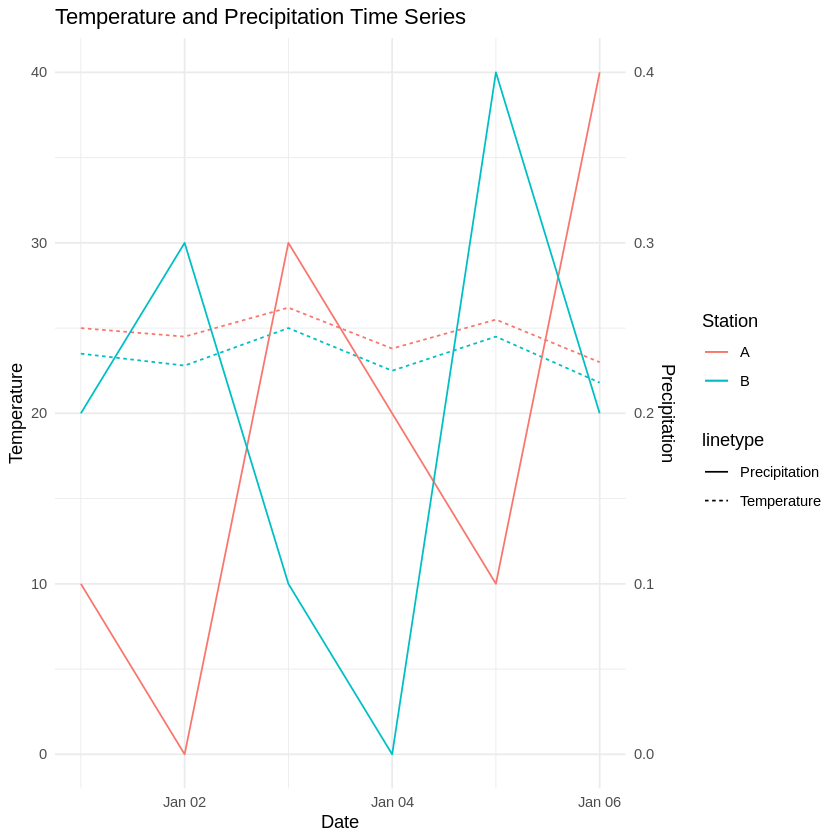

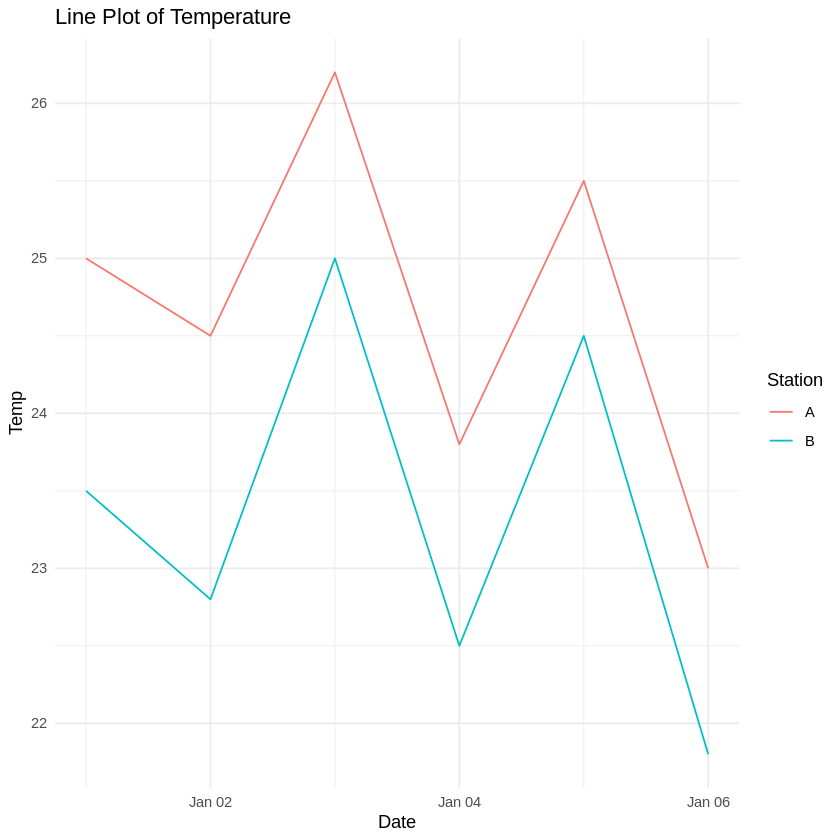

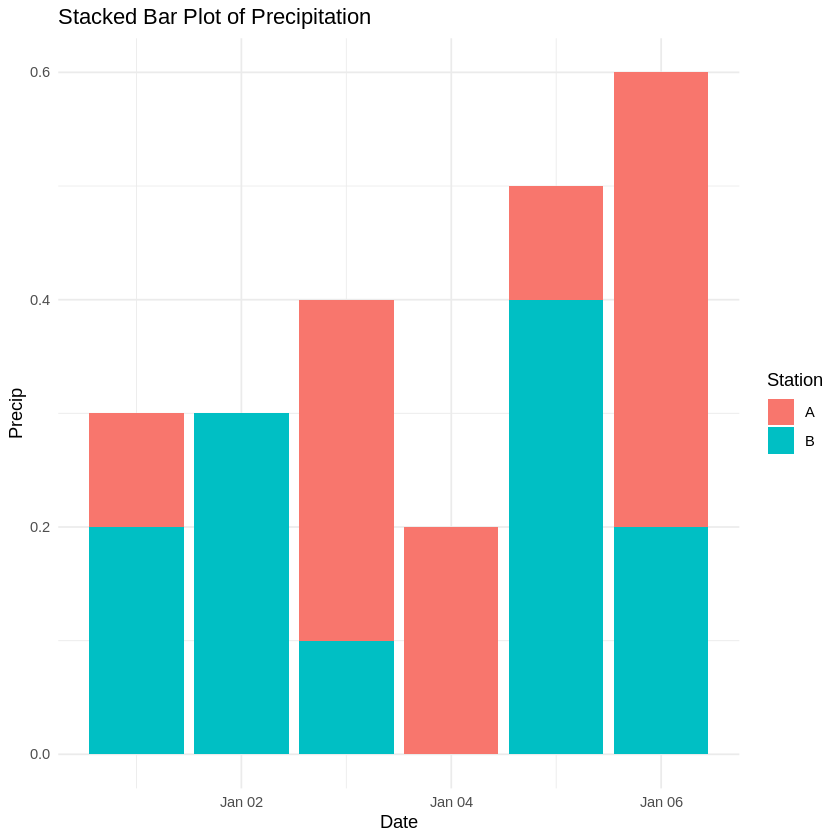

In [6]:
library(ggplot2)
library(tidyr)

data <- data.frame(
  Date = as.Date(c("2024-01-01", "2024-01-02", "2024-01-03", "2024-01-04", "2024-01-05", "2024-01-06")),
  Station_A_Temp = c(25.0, 24.5, 26.2, 23.8, 25.5, 23.0),
  Station_A_Precip = c(0.1, 0.0, 0.3, 0.2, 0.1, 0.4),
  Station_B_Temp = c(23.5, 22.8, 25.0, 22.5, 24.5, 21.8),
  Station_B_Precip = c(0.2, 0.3, 0.1, 0.0, 0.4, 0.2)
)

data_long <- pivot_longer(data, cols = -Date, names_to = c("Station", ".value"), names_pattern = "Station_(.*)_(.*)")

time_series_plot <- ggplot(data_long, aes(x = Date)) +
  geom_line(aes(y = Temp, color = Station, linetype = "Temperature")) +
  geom_line(aes(y = Precip * 100, color = Station, linetype = "Precipitation")) +
  scale_y_continuous(sec.axis = sec_axis(~./100, name = "Precipitation")) +
  theme_minimal() +
  labs(title = "Temperature and Precipitation Time Series", y = "Temperature")

line_plot <- ggplot(data_long, aes(x = Date, y = Temp, color = Station)) +
  geom_line() +
  theme_minimal() +
  labs(title = "Line Plot of Temperature")

stacked_bar_plot <- ggplot(data_long, aes(x = Date, y = Precip, fill = Station)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  labs(title = "Stacked Bar Plot of Precipitation")

print(time_series_plot)
print(line_plot)
print(stacked_bar_plot)

4) R script for browser usage plots

---



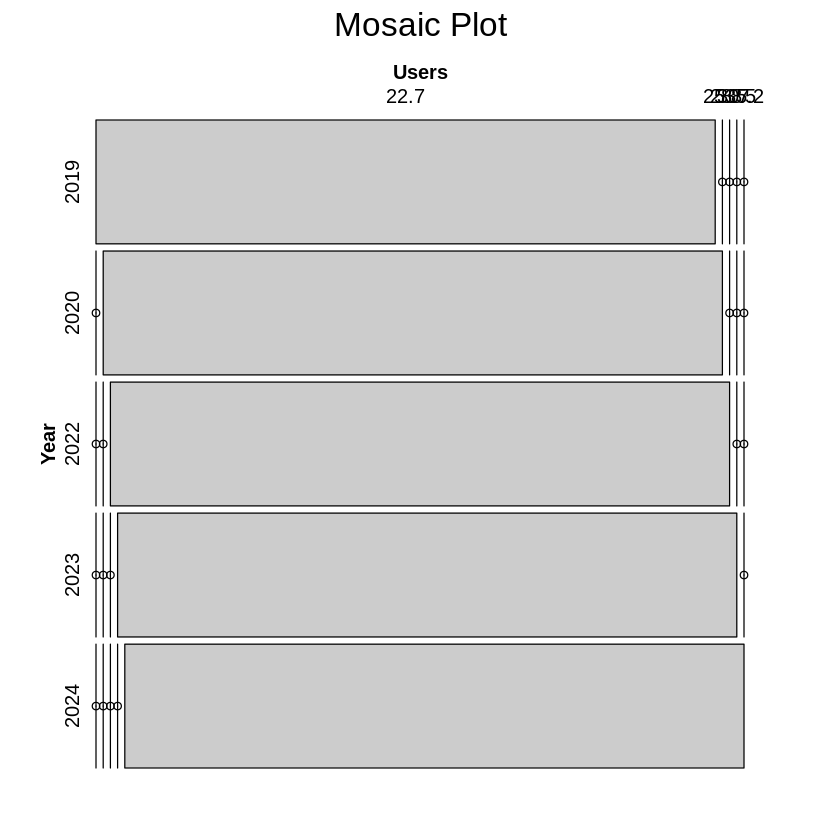

     Users 22.7 25.8 28.7 30.5 35.2
Year                               
2019          1    0    0    0    0
2020          0    1    0    0    0
2022          0    0    1    0    0
2023          0    0    0    1    0
2024          0    0    0    0    1


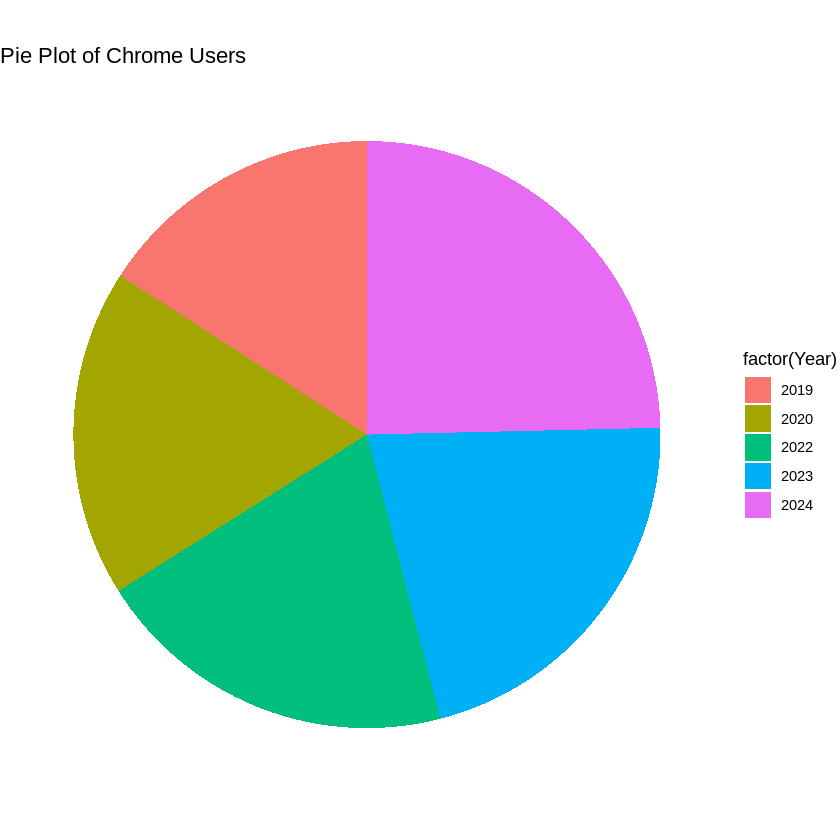

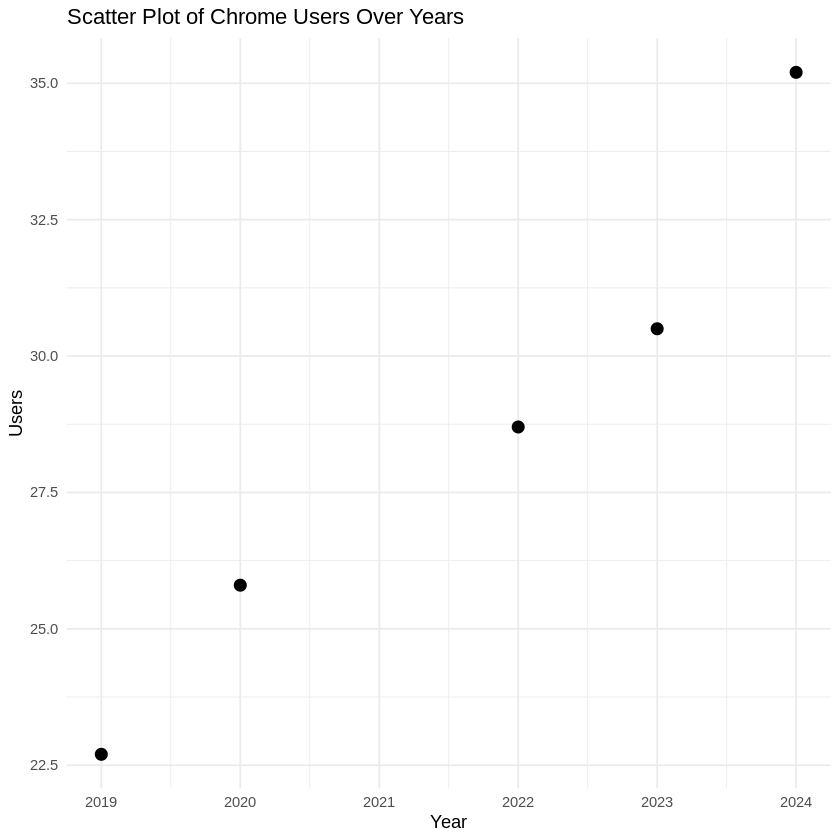

In [7]:
library(ggplot2)
library(vcd)

data <- data.frame(
  Year = c(2019, 2020, 2022, 2023, 2024),
  Browser = rep("Chrome", 5),
  Users = c(22.7, 25.8, 28.7, 30.5, 35.2)
)

pie_plot <- ggplot(data, aes(x = "", y = Users, fill = factor(Year))) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  theme_void() +
  labs(title = "Pie Plot of Chrome Users")

mosaic_plot <- mosaic(~ Year + Users, data = data, main = "Mosaic Plot")

scatter_plot <- ggplot(data, aes(x = Year, y = Users)) +
  geom_point(size = 3) +
  theme_minimal() +
  labs(title = "Scatter Plot of Chrome Users Over Years")

print(pie_plot)
print(mosaic_plot)
print(scatter_plot)

5) R script for job sector plots

---



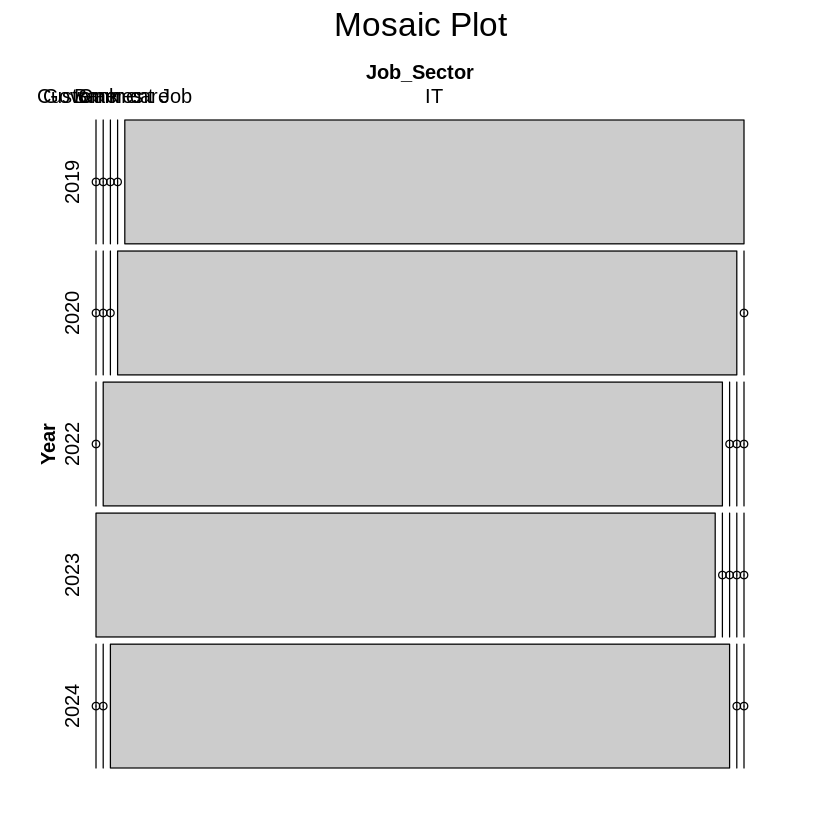

     Job_Sector Bank Customer care Games Government Job IT
Year                                                      
2019               0             0     0              0  1
2020               0             0     0              1  0
2022               0             1     0              0  0
2023               1             0     0              0  0
2024               0             0     1              0  0


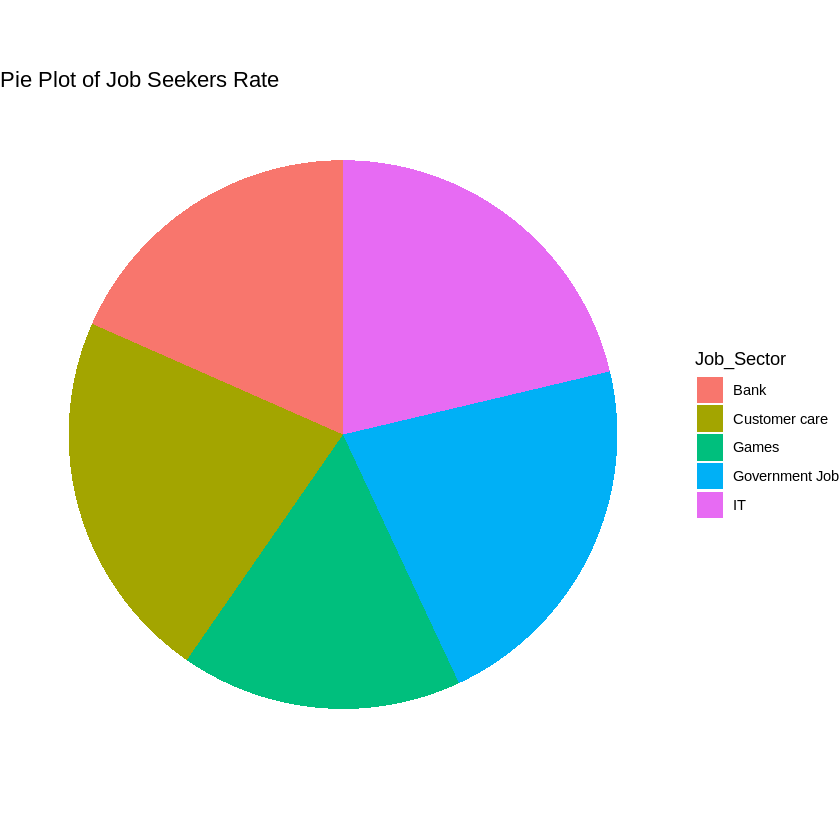

In [10]:
library(ggplot2)
library(vcd)
library(plotly)

data <- data.frame(
  Year = c(2019, 2020, 2022, 2023, 2024),
  Job_Sector = c("IT", "Government Job", "Customer care", "Bank", "Games"),
  Job_Seekers_Rate = c(95, 97, 98, 82, 74),
  Selection_Rate = c(25, 12, 45, 20, 35)
)

pie_plot <- ggplot(data, aes(x = "", y = Job_Seekers_Rate, fill = Job_Sector)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  theme_void() +
  labs(title = "Pie Plot of Job Seekers Rate")

mosaic_plot <- mosaic(~ Year + Job_Sector, data = data, main = "Mosaic Plot")

funnel_plot <- plot_ly(
  data,
  y = ~Job_Sector,
  x = ~Selection_Rate,
  type = "funnel",
  textposition = "inside",
  textinfo = "value+percent initial"
)

print(pie_plot)
print(mosaic_plot)
print(funnel_plot)